<h1><b>London House Price Linear Regression Model</b></h1>

<h3>Determine the price of London properties.</h3>

The goal of this notebook is to use linear regresstion to create a model to predict housing prices in London. This model could be used by real estate companies, those who are interested in buying a London property, others who have some engagement in London properties. 

The dataset was downloaded from Kaggle, I do not own this data.

Variables used in this notebook:
 - X = Input data to the training model (X_train, X_test, etc. are similar)
 - y       = Target data, what we are trying to predict (y_train, y_test, etc. are similar)
 - w       = Slope model parameter(s), determine the weight to be multiplied by each input.
 - b       = Intercept model parameter for the model.
 - alpha   = The learning rate, determines how big of a step the model adjusts each iteration
 - lambda_ = Variable to control the strength of the regularization in the model. Regularization is used to reduce overfitting in the model.


**Breif Linear Regression Information:**

Simple linear regression is a method to find the best linear relationship between input variable(s) (features) and the target value. The data will be split into a train and test set, usually the train set contains 75% of the data and will be tested on 25% of the data. The model minimizes the difference between predicted and actual values by adjusting the slope and intercept of the line, aiming to reduce the error (cost) as much as possible.

<h3>Install / Import Needed Packages</h3>

In [1]:
#pip install pandas

In [2]:
#pip install numpy

In [3]:
#pip install matplotlib

In [4]:
#pip install dython

In [5]:
#pip install seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stats
from dython.nominal import associations
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<h3>Load the Dataset</h3>
Load the data from the .csv file, check the shape of the data, and view the dataframe.

In [7]:
df = pd.read_csv('london_houses.csv')

# Keep a copy of the original dataset
df_orig = df

Shape of the data

In [8]:
print('Data Points: ', df.shape[0])
print('Number of Variables: ',df.shape[1])

Data Points:  1000
Number of Variables:  17


Show the first five rows.

In [9]:
df.head(5)

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


The Address column may be important in the future although we will remove it for now. We have the neighborhood data included and can use this. Lets remove the pound symbol next to the price and rename it with letters.

In [10]:
df = df.drop(columns='Address')
df['Price (Pounds)'] = df['Price (£)']
df = df.drop(columns='Price (£)')

Display the updated dataframe.

In [11]:
df.head()

,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (Pounds)
0,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


<h3>Clean Data</h3>
There are some strings in the data above. Lets see the unique options for each then group by them numerically.

In [12]:
print('Unique Neighborhood Options:', df['Neighborhood'].unique())
print('Unique Garden Options:',df['Garden'].unique())
print('Unique Garage Options:',df['Garage'].unique())
print('Unique Property Type Options:', df['Property Type'].unique())
print('Unique Heating Type Options:', df['Heating Type'].unique())
print('Unique Balcony Options:', df['Balcony'].unique())
print('Unique Interior Style Options:', df['Interior Style'].unique())
print('Unique View Options:', df['View'].unique())
print('Unique Materials Options:', df['Materials'].unique())
print('Unique Building Status Options:', df['Building Status'].unique())

Unique Neighborhood Options: ['Notting Hill' 'Westminster' 'Soho' 'Islington' 'Marylebone' 'Kensington'
 'Greenwich' 'Shoreditch' 'Camden' 'Chelsea']
Unique Garden Options: ['No' 'Yes']
Unique Garage Options: ['No' 'Yes']
Unique Property Type Options: ['Semi-Detached' 'Apartment' 'Detached House']
Unique Heating Type Options: ['Electric Heating' 'Central Heating' 'Underfloor Heating' 'Gas Heating']
Unique Balcony Options: ['High-level Balcony' 'No Balcony' 'Low-level Balcony']
Unique Interior Style Options: ['Industrial' 'Classic' 'Modern' 'Minimalist']
Unique View Options: ['Garden' 'City' 'Street' 'Park' 'Sea']
Unique Materials Options: ['Marble' 'Laminate Flooring' 'Wood' 'Granite']
Unique Building Status Options: ['Renovated' 'Old' 'New']


Lets assign a number to each unique category for the string columns in the dataframe above. This will let us group by them easier.

In [13]:
df['Neighborhood'] = pd.factorize(df['Neighborhood'])[0]+1
df['Garden'] = pd.factorize(df['Garden'])[0]
df['Garage'] = pd.factorize(df['Garage'])[0]
df['Property Type'] = pd.factorize(df['Property Type'])[0]+1
df['Heating Type'] = pd.factorize(df['Heating Type'])[0]+1
df['Balcony'] = pd.factorize(df['Balcony'])[0]+1
df['Interior Style'] = pd.factorize(df['Interior Style'])[0]+1
df['View'] = pd.factorize(df['View'])[0]+1
df['Materials'] = pd.factorize(df['Materials'])[0]+1
df['Building Status'] = pd.factorize(df['Building Status'])[0]+1

Find the minimum and maximum house price in the dataset.

Becuase the Price column is large, lets divive by the largest factor of ten feasible. In this case: 100,000.

In [14]:
df['Price'] = df['Price (Pounds)']/100000
df = df.drop(columns='Price (Pounds)')

In [15]:
print('Min Price (Multiply by 1e5): ', round(min(df['Price'])*1e5))
print('Max Price (Multiply by 1e5): ', round(max(df['Price'])*1e5))

Min Price (Multiply by 1e5):  386666
Max Price (Multiply by 1e5):  4980000


<h3>Inspect the Correlations between the Data</h3>

In [16]:
correlations = df.corr()
important_features = correlations['Price'].sort_values(ascending=False)

print('Descending Correlation to Housing Price:')
print()
print(important_features)

Descending Correlation to Housing Price:

Price              1.000000
Square Meters      0.790652
Property Type      0.179019
Interior Style     0.059876
Garage             0.046790
Materials          0.031972
Building Age       0.031522
Floors             0.015625
Building Status   -0.005634
View              -0.007604
Garden            -0.008594
Balcony           -0.016167
Bedrooms          -0.016679
Heating Type      -0.026445
Bathrooms         -0.032632
Neighborhood      -0.053491
Name: Price, dtype: float64


To create a visual aid, lets create a heatmap of the correlation.

**Note:** At the end of this notebook there is a further visualization of the impact of each feature on the price.

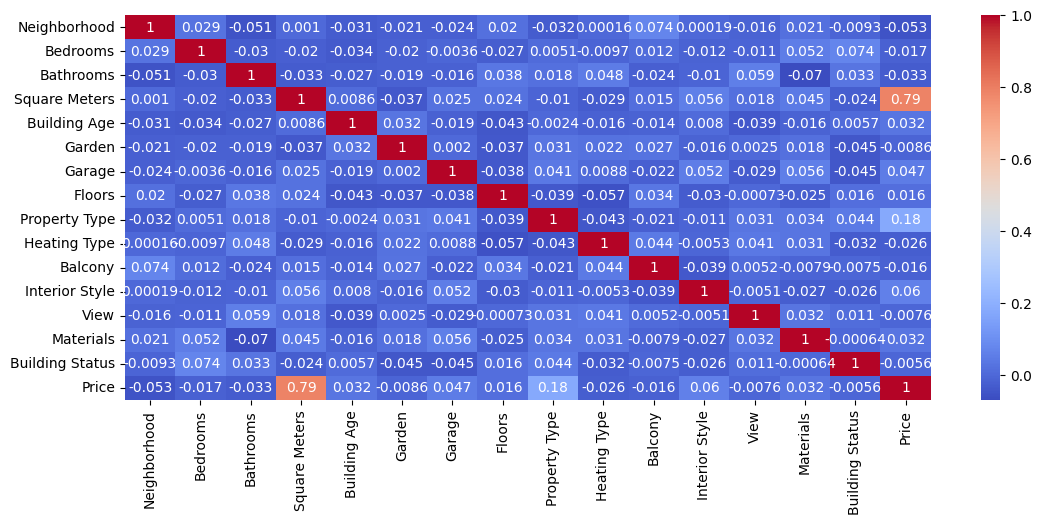

In [17]:
fig = plt.figure(figsize=(13,5))
sns.heatmap(correlations,annot=True,cmap='coolwarm')
plt.show()

We see the highest correlation is square meters, then followed by a lower correlated property type. Even though theres a gap between the two, lets use the top two correlated variables for our model.

<h3>Scatter Plot of Correlation</h3>

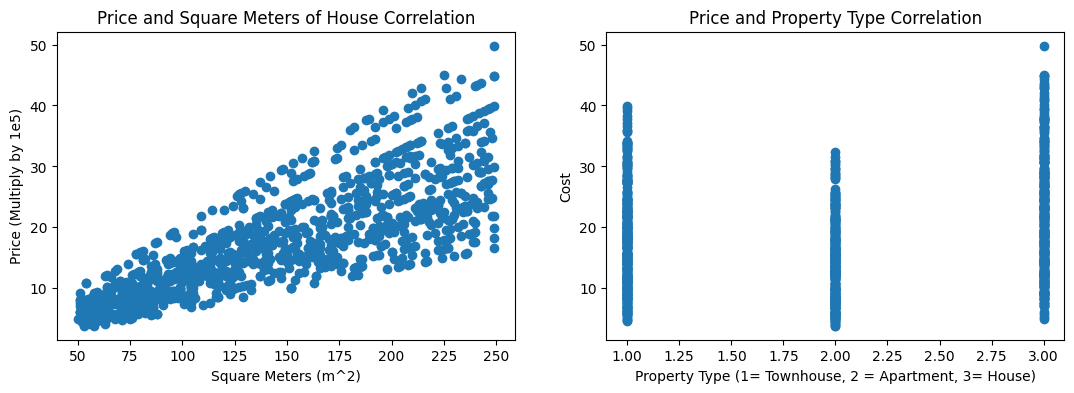

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

ax1.scatter(df['Square Meters'],df['Price'])
ax1.set_title('Price and Square Meters of House Correlation')
ax1.set_xlabel('Square Meters (m^2)')
ax1.set_ylabel('Price (Multiply by 1e5)')

ax2.scatter(df['Property Type'],df['Price'])
ax2.set_title('Price and Property Type Correlation')
ax2.set_xlabel('Property Type (1= Townhouse, 2 = Apartment, 3= House)')
ax2.set_ylabel('Cost')

plt.show()

As the correlation values show, there is a stronger correlation between the square meters and the price of the house. However, lets continue with both variables as inputs to the model for now.

<h3>Data formatting</h3>
Create the X and y arrays for the input and target variables.

In [19]:
# Top  correlated features of dataset
X_All = df.drop(columns = 'Price')
X = df[['Square Meters','Property Type']]
X = X.to_numpy()

# Target Features
y = df[['Price']]
y = y.to_numpy()

Split into a 75% and 25%, train and test set.

In [20]:
# Set test size.. between 0-1
test_size = 0.75

split_index = int(len(X) * test_size)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

<h3>Compute Cost</h3>
The function below calculates the cost of the function. It uses the mean square error method of calculating the cost.

In [21]:
def compute_cost(X,y,w,b,lambda_=1):
    
    m = X.shape[0]
    n = len(w)
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i],w)+b
        cost += (f_wb_i - y[i])**2

    cost = cost/(2*m)

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/2*m) * reg_cost
    total_cost = reg_cost + cost
    
    return total_cost

<h3>Test Initial Model Parameters Set to Zero</h3>
Ensure the function works and see the initial value of the cost.

In [22]:
# Size of examples and features
m,n = X_train.shape

# Set the initial parameters
w_initial = np.zeros(n)
b_initial = 0.

cost = compute_cost(X_train,y_train,w_initial,b_initial)
cost = float(cost)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 206.826


<h3>Test Model With Non-Zeros</h3>

In [23]:
# Set the initial parameters
w_initial = np.ones(X_train.shape[1])
b_initial = 1

cost = compute_cost(X_train,y_train,w_initial,b_initial)
cost = float(cost)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 11013.430


<h3>Compute Gradient</h3>
The function below calculates the gradient, this is the derivative of the w and b terms.

In [24]:
def compute_gradient(X,y,w,b,lambda_=1):
    # Args: X - Data, y - Target Values, w - slope values, b - intercept value, lambda_ - regularization
    
    m = X.shape[0]
    n = len(w)
    
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    if n == 1:
        for i in range(m):
            err_i = (np.dot(X[i],w)+b) - y[i]
            dj_dw = dj_dw + err_i * X[i]
            dj_db = dj_db + err_i
    
        dj_dw = dj_dw / m
        dj_db = dj_db / m

    else:
        for i in range(m):
            err_i = (np.dot(X[i],w)+b) - y[i]
            for j in range(n):
                dj_dw[j] = dj_dw[j] + err_i * X[i,j]
            dj_db = dj_db + err_i
    
        dj_dw = dj_dw / m
        dj_db = dj_db / m
    
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (lambda_/m)* w[j]

    return dj_db, dj_dw

<h3>Run Gradient with Zeros</h3>
Run the function to ensure this has been coded correctly.

In [25]:
w_initial = np.zeros(X.shape[1])
b_initial = 0

dj_db, dj_dw = compute_gradient(X_train,y_train,w_initial,b_initial)
print('dj_db at initial w and b:', dj_db)
print('dj_dw at initial w and b:', dj_dw)

dj_db at initial w and b: [-18.37742132]
dj_dw at initial w and b: [-3136.58798909   -38.36194471]


<h3>Test with Non-Zeros</h3>

In [26]:
w_initial = np.ones(X.shape[1])
b_initial = 1

dj_db, dj_dw = compute_gradient(X_train,y_train,w_initial,b_initial)
print('dj_db at initial w and b:', dj_db)
print('dj_dw at initial w and b:', dj_dw)

dj_db at initial w and b: [133.65991201]
dj_dw at initial w and b: [22904.73067757   268.14872196]


<h3>Define Gradient Descent</h3>
The function below iterates through computing the gradient and cost of the function as it simultaneously updates the weights of the parameter. When the right values are set and the model will fit, the cost will drop steep and flatten out, converging to a single value. The weights will converge to a value as well.

In [27]:
def gradient_descent(X,y,w_in,b_in,compute_cost,compute_gradient, alpha,num_iters):

    m = len(X)

    J_hist = []
    w_hist = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X,y,w_in,b_in)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i < 100000:
            cost = compute_cost(X,y,w_in,b_in)
            J_hist.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_hist.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}    ")
    return w_in, b_in, J_hist, w_hist

<h3>Run Gradient Descent</h3>
Test an initial case of gradient descent.

Iteration    0: Cost 10835.29    
Iteration  100: Cost  2319.82    
Iteration  200: Cost   747.97    
Iteration  300: Cost   455.18    
Iteration  400: Cost   399.51    
Iteration  500: Cost   388.46    
Iteration  600: Cost   386.07    
Iteration  700: Cost   385.47    
Iteration  800: Cost   385.30    
Iteration  900: Cost   385.24    
Iteration  999: Cost   385.22    
Final w:  [0.10536341 0.989555  ]
Final b:  [0.99469513]


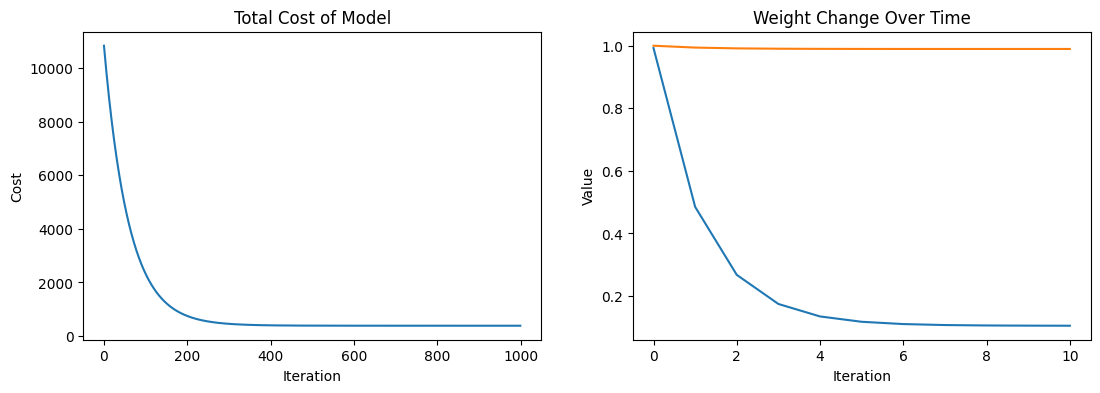

In [28]:
w_init = np.ones([X.shape[1]])
b_init = 1

iterations = 1000
alpha = 0.00000033

w,b,J_hist,w_hist = gradient_descent(X_train,y_train,w_init,b_init,compute_cost,compute_gradient,alpha,iterations)

print('Final w: ', w)
print('Final b: ', b)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

ax1.plot(J_hist)
ax1.set_title('Total Cost of Model')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')

ax2.plot(w_hist)
ax2.set_title('Weight Change Over Time')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value')
plt.show()

<h3>Repeat as Needed</h3>
Update the model parameters as well as the number of iterations and alpha (learning rate) as seen necessary.

Iteration    0: Cost   385.22    
Iteration  100: Cost   385.22    
Iteration  200: Cost   385.22    
Iteration  300: Cost   385.22    
Iteration  400: Cost   385.22    
Iteration  500: Cost   385.22    
Iteration  600: Cost   385.22    
Iteration  700: Cost   385.22    
Iteration  800: Cost   385.22    
Iteration  900: Cost   385.22    
Iteration  999: Cost   385.22    
Final w:  [0.10536293 0.989555  ]
Final b:  [0.9946951]


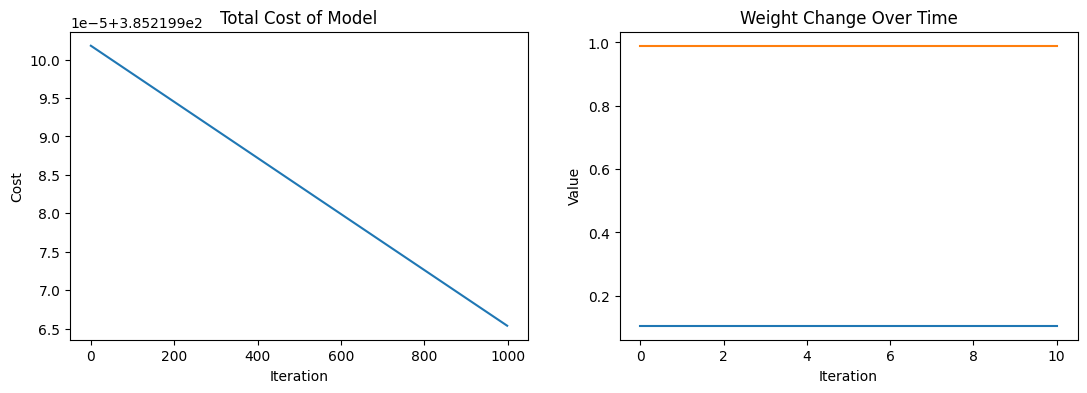

In [29]:
w_init = w
b_init = b

iterations = 1000
alpha = 0.0000000001

w,b,J_hist,w_hist = gradient_descent(X_train,y_train,w_init,b_init,compute_cost,compute_gradient,alpha,iterations)

print('Final w: ', w)
print('Final b: ', b)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

ax1.plot(J_hist)
ax1.set_title('Total Cost of Model')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')

ax2.plot(w_hist)
ax2.set_title('Weight Change Over Time')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value')

plt.show()

We have reached a point by using the first gradient descent weight values for the second iterations, where our cost is chaninging minimally and so are the weights. This means we will use the model parameters output in the code above. Lets move onto testing out our model on the test data.

In [30]:
print('Final Model Weight for w: ', w)
print('Final Model Weight for b: ', b)

Final Model Weight for w:  [0.10536293 0.989555  ]
Final Model Weight for b:  [0.9946951]


<h3>Compute Accuracy of Model on Test Data</h3>
The function below calculates the prediction using the final weights mentioned in the lines above, and a test dataset.

In [31]:
def predict(X,w,b):
    # Args: X - Data, w - slope weights, b - intercept, threshold - value to set prediction to a 1
    
    m = X.shape[0]
    n = len(w)
    p = np.zeros(m)
    
    for i in range(m):
        p[i] = np.dot(X[i],w)+b
        
    return p

<h3>Measuring Accuracy</h3>

Lets predict the training dataset house values with our final model weights. Then take the delta of the actual and predicted values and plot this on a histogram to see the distribution of the 

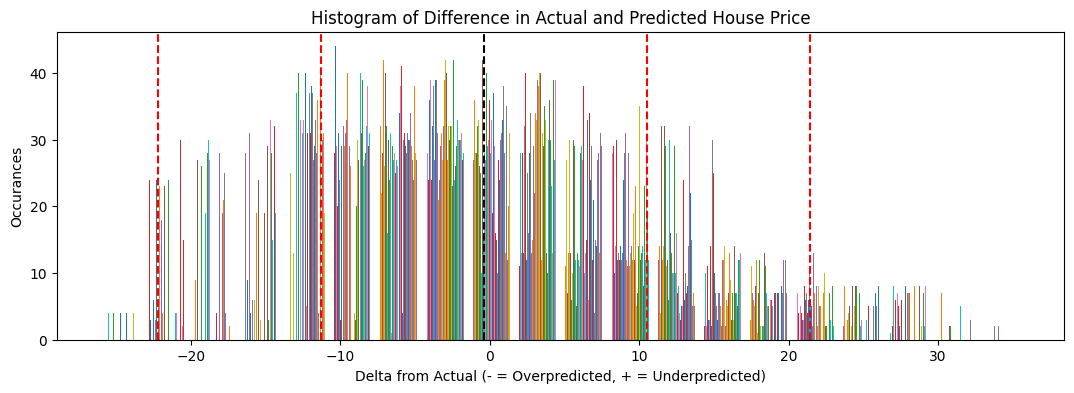

In [32]:
pred = predict(X_test,w,b)

deltaActPred = y_test - pred

stdevDelta = np.std(deltaActPred)
meanDelta = np.mean(deltaActPred)

fig = plt.figure(figsize=(13,4))
plt.hist(deltaActPred, bins=20)
plt.axvline(x=meanDelta,linestyle='--',color='black')
plt.axvline(x=meanDelta + stdevDelta,color='red',linestyle = '--')
plt.axvline(x=meanDelta - stdevDelta,color='red',linestyle = '--')
plt.axvline(x=meanDelta + 2*stdevDelta,color='red',linestyle = '--')
plt.axvline(x=meanDelta - 2*stdevDelta,color='red',linestyle = '--')
plt.title('Histogram of Difference in Actual and Predicted House Price')
plt.xlabel('Delta from Actual (- = Overpredicted, + = Underpredicted)')
plt.ylabel('Occurances')
plt.show()

The visual above shows the distribution of the delta between the actual and predicted values. The negative values are overpredicted by the model and the positive values are underpredicted.

The mean of this dataset is shown by the vertical black dotted line, along with the first two standard deviations +/- of the mean in red. The distribution of this data is roughly similar to a normal distribution, so we can proceed with using the standard deviation as a good estimater of the spread.

These statistics show that 68% of the time, the prediction is within +/- 1 million pounds of the actual value, and 95% of the time within +/- 2 million pounds.

Th2is isn't what we were hoping for.. 

Lets try an alternative route. I would guess that the property type and neighborhood are the most important features to a property to determine the price. Lets see if that prediction is true.

<h3>Different Perspective of the Data</h3>
Quick glance to see if there look like there is a relationship between the square meters of the house and price, along with the neighborhood the property is in.

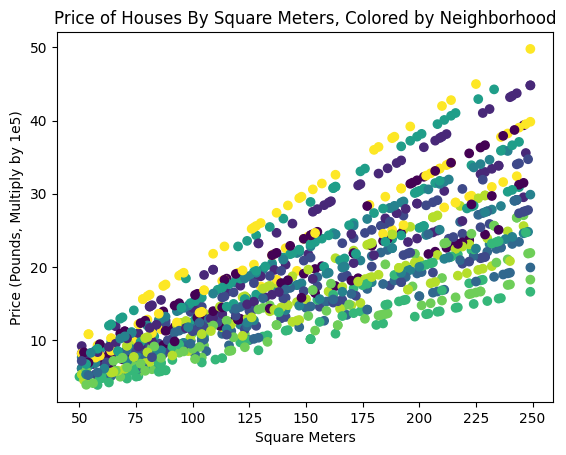

In [33]:
plt.scatter(df['Square Meters'],df['Price'],c=df['Neighborhood'])
plt.title('Price of Houses By Square Meters, Colored by Neighborhood')
plt.xlabel('Square Meters')
plt.ylabel('Price (Pounds, Multiply by 1e5)')
plt.show()

There is a clear difference in the price of a house by the neighborhood the property is in. Lets hone in on one as an example.

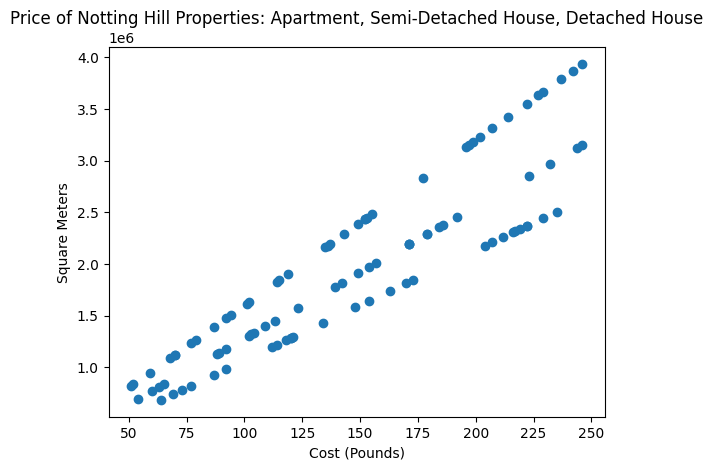

In [34]:
neighborhoodTest = df_orig[df_orig['Neighborhood'] == 'Notting Hill']

plt.scatter(neighborhoodTest['Square Meters'],neighborhoodTest['Price (£)'])
plt.title('Price of Notting Hill Properties: Apartment, Semi-Detached House, Detached House')
plt.xlabel('Cost (Pounds)')
plt.ylabel('Square Meters')
plt.show()

In this Notting Hill example, there are three different lines to represent the cost of three different types of housing: apartments, semi-detached housing, and detached housing. Lets validate this theory by looking only at detached houses in the Notting Hill neighborhood.

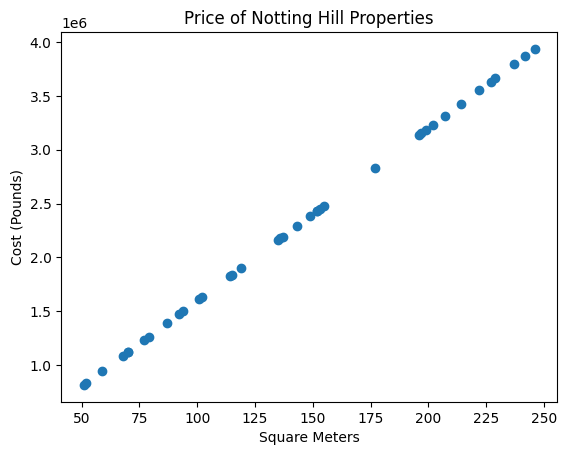

In [35]:
neighborhoodTest = neighborhoodTest[neighborhoodTest['Property Type'] == 'Detached House']

plt.scatter(neighborhoodTest['Square Meters'],neighborhoodTest['Price (£)'])
plt.title('Price of Notting Hill Properties')
plt.ylabel('Cost (Pounds)')
plt.xlabel('Square Meters')
plt.show()

This proves the theory is correct, the price of a house is linear when taken into consideration the neighborhood and propety type. Lets move forward with further analysis and model creation.

<h3>Interactive Model to Predict Housing Prices</h3>
Use the output of the cell below to decide which neighborhood and property type you are interested in, then enter the information into the following cell.

In [36]:
print('Neighborhood Options: ', df_orig['Neighborhood'].unique())
print()
print('Property Type Options: ', df_orig['Property Type'].unique())

Neighborhood Options:  ['Notting Hill' 'Westminster' 'Soho' 'Islington' 'Marylebone' 'Kensington'
 'Greenwich' 'Shoreditch' 'Camden' 'Chelsea']

Property Type Options:  ['Semi-Detached' 'Apartment' 'Detached House']


In [37]:
neighborhood = 'Chelsea'
propertyType = 'Apartment'

df2 = df_orig[df_orig['Neighborhood'] == neighborhood]
df2 = df2[df2['Property Type'] == propertyType] 
df2.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
53,103 Bond Street,Chelsea,5,2,74,79,Yes,No,3,Apartment,Gas Heating,Low-level Balcony,Industrial,Garden,Laminate Flooring,New,986666
62,89 Regent Street,Chelsea,4,2,86,1,No,No,3,Apartment,Gas Heating,High-level Balcony,Classic,Street,Wood,Renovated,1146666
105,53 Baker Street,Chelsea,1,2,232,91,Yes,No,3,Apartment,Central Heating,No Balcony,Industrial,Sea,Granite,New,3093333
133,115 Strand,Chelsea,4,1,188,13,Yes,Yes,2,Apartment,Gas Heating,No Balcony,Modern,Sea,Wood,Old,2506666
161,24 Regent Street,Chelsea,5,3,193,76,No,No,3,Apartment,Gas Heating,Low-level Balcony,Industrial,City,Wood,Old,2573333


Lets see the shape of the new dataframe, then replace the strings and price with the updates we made earlier.

In [38]:
df2.shape

(24, 17)

In [39]:
df2 = df2.drop(columns='Address')
df2['Price (Pounds)'] = df2['Price (£)']
df2 = df2.drop(columns='Price (£)')

df2['Neighborhood'] = pd.factorize(df2['Neighborhood'])[0]+1
df2['Garden'] = pd.factorize(df2['Garden'])[0]
df2['Garage'] = pd.factorize(df2['Garage'])[0]
df2['Property Type'] = pd.factorize(df2['Property Type'])[0]+1
df2['Heating Type'] = pd.factorize(df2['Heating Type'])[0]+1
df2['Balcony'] = pd.factorize(df2['Balcony'])[0]+1
df2['Interior Style'] = pd.factorize(df2['Interior Style'])[0]+1
df2['View'] = pd.factorize(df2['View'])[0]+1
df2['Materials'] = pd.factorize(df2['Materials'])[0]+1
df2['Building Status'] = pd.factorize(df2['Building Status'])[0]+1

df2['Price'] = df2['Price (Pounds)']/100000
df2 = df2.drop(columns='Price (Pounds)')
df2 = df2.drop(columns='Neighborhood')
df2 = df2.drop(columns='Property Type')

New lets see the updated dataframe with only the selected neighborhood.

In [40]:
df2.head()

,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price
53,5,2,74,79,0,0,3,1,1,1,1,1,1,9.86666
62,4,2,86,1,1,0,3,1,2,2,2,2,2,11.46666
105,1,2,232,91,0,0,3,2,3,1,3,3,1,30.93333
133,4,1,188,13,0,1,2,1,3,3,3,2,3,25.06666
161,5,3,193,76,1,0,3,1,1,1,4,2,3,25.73333


Now lets reevaluate the correlations between the parameters and the price.

In [41]:
correlations2 = df2.corr()
important_features2 = correlations2['Price'].sort_values(ascending=False)

print('Descending correlation to housing price for current selection:')
print()
print(important_features2)

Descending correlation to housing price for current selection:

Price              1.000000
Square Meters      1.000000
Garden             0.410299
Garage             0.318728
Balcony            0.261068
View               0.237172
Floors             0.194569
Building Age       0.188904
Bathrooms          0.159977
Materials          0.159837
Heating Type      -0.003607
Interior Style    -0.061897
Building Status   -0.311467
Bedrooms          -0.427170
Name: Price, dtype: float64


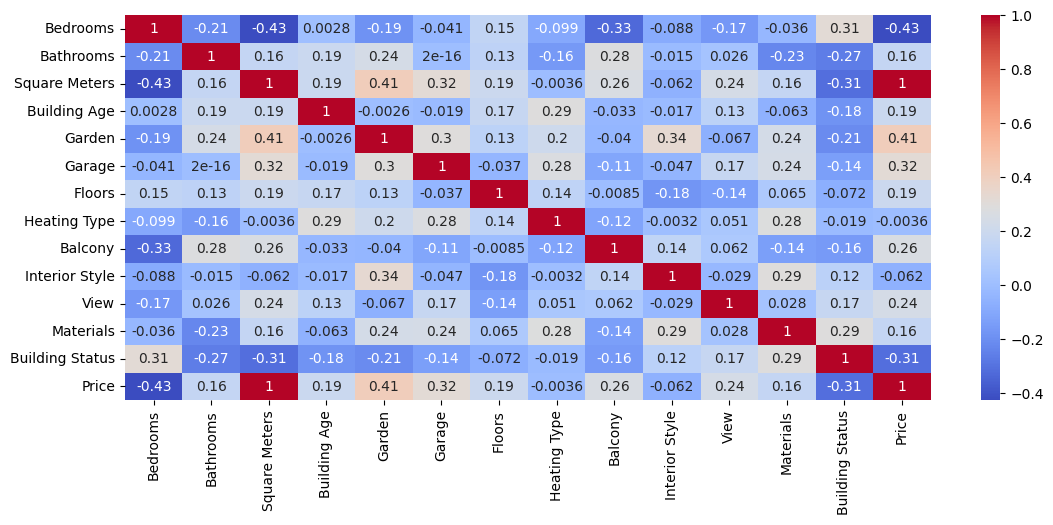

In [42]:
fig = plt.figure(figsize=(13,5))
sns.heatmap(correlations2,annot=True,cmap='coolwarm')
plt.show()

The correlation between Square Meters is close or at 1! This is by far the highest correlation, we can use simple linear regression with the square meters feature. 

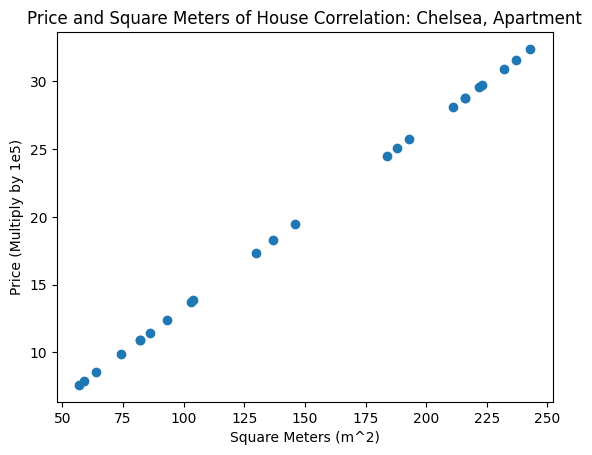

In [43]:
plt.scatter(df2['Square Meters'],df2['Price'])
plt.title('Price and Square Meters of House Correlation: ' + neighborhood + ', ' + propertyType)
plt.xlabel('Square Meters (m^2)')
plt.ylabel('Price (Multiply by 1e5)')

plt.show()

<h3>Data Formatting</h3>
Lets split the data into train and test groups

In [44]:
splitIndex = math.ceil(df2.shape[0]*0.75)

X2 = df2['Square Meters']
X2 = X2.to_numpy()
X2_train = X2[:splitIndex] 
X2_test = X2[splitIndex:]

y2 = df2['Price']
y2 = y2.to_numpy()
y2_train = y2[:splitIndex] 
y2_test = y2[splitIndex:]

print('X2_train Shape: ', X2_train.shape)
print('X2_test Shape: ', X2_test.shape)
print('y2_train Shape: ', y2_train.shape)
print('y2_train Shape: ', y2_test.shape)

X2_train Shape:  (18,)
X2_test Shape:  (6,)
y2_train Shape:  (18,)
y2_train Shape:  (6,)


<h3>Gradient Descent</h3>
We will use the same functions defined above, lets go right into gradient descent.

Iteration    0: Cost  9769.48    
Iteration 2000: Cost   430.11    
Iteration 4000: Cost    19.14    
Iteration 6000: Cost     1.01    
Iteration 8000: Cost     0.20    
Iteration 10000: Cost     0.16    
Iteration 12000: Cost     0.16    
Iteration 14000: Cost     0.16    
Iteration 16000: Cost     0.16    
Iteration 18000: Cost     0.16    
Iteration 19999: Cost     0.16    
Final w:  [0.13324865]
Final b:  [0.01514478]


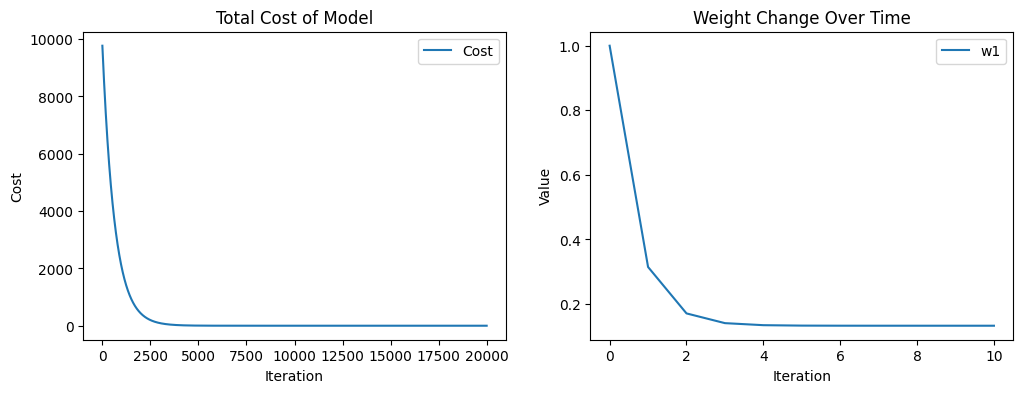

In [45]:
w_init = np.array([1])
b_init = 0.02

iterations = 20000
alpha = 0.00000003

w2,b2,J_hist2,w_hist2 = gradient_descent(X2_train,y2_train,w_init,b_init,compute_cost,compute_gradient,alpha,iterations)

print('Final w: ', w2)
print('Final b: ', b2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(J_hist2,label='Cost')
ax1.set_title('Total Cost of Model')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.legend()

ax2.plot(w_hist2,label='w1')
ax2.set_title('Weight Change Over Time')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value')
ax2.legend()
plt.show()

Wow! Look at the cost of this model, its nearly 0. Lets plot the model on the train data then run the test data through this model and create a histogram to see how well our model fits the data.

In [46]:
print('Final Model Weight for w: ', w2[0])
print('Final Model Weight for b: ', b2[0])

Final Model Weight for w:  0.13324865206913677
Final Model Weight for b:  0.015144777059046948


<h3>Overlay the Model on the Train Data</h3>
To see how well the model fits the data.

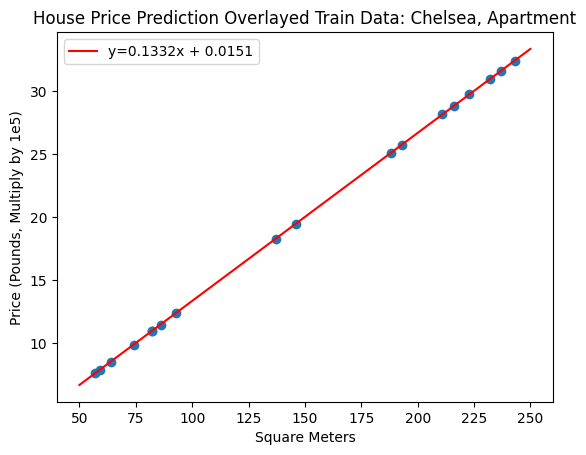

In [47]:
x = np.linspace(50,250, X2_train.shape[0])
trainPred = w2*x + b2

w2Str = str(w2[0])
w2Str = w2Str[:6]
b2Str = str(b2[0])
b2Str = b2Str[:6]

equation = 'y=' + w2Str + 'x' + ' + ' + b2Str

plt.scatter(X2_train,y2_train)
plt.plot(x,trainPred,color='Red', label = equation)
plt.title('House Price Prediction Overlayed Train Data: ' + neighborhood + ', ' + propertyType)
plt.ylabel('Price (Pounds, Multiply by 1e5)')
plt.xlabel('Square Meters')
plt.legend()
plt.show()

The model fits the data very well.

<h3>Model on Test Data</h3>
Lets compute how well the model performed on the test data.

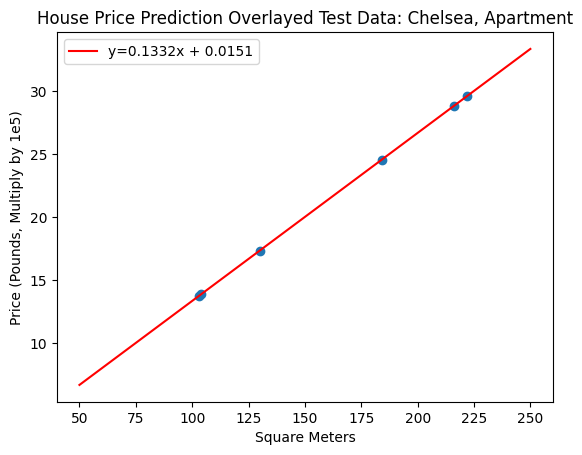

In [48]:
x = np.linspace(50,250, X2_test.shape[0])
testPred = w2*x + b2

w2Str = str(w2[0])
w2Str = w2Str[:6]
b2Str = str(b2[0])
b2Str = b2Str[:6]

equation = 'y=' + w2Str + 'x' + ' + ' + b2Str

plt.scatter(X2_test,y2_test)
plt.plot(x,testPred,color='Red', label = equation)
plt.title('House Price Prediction Overlayed Test Data: ' + neighborhood + ', ' + propertyType)
plt.ylabel('Price (Pounds, Multiply by 1e5)')
plt.xlabel('Square Meters')
plt.legend()
plt.show()

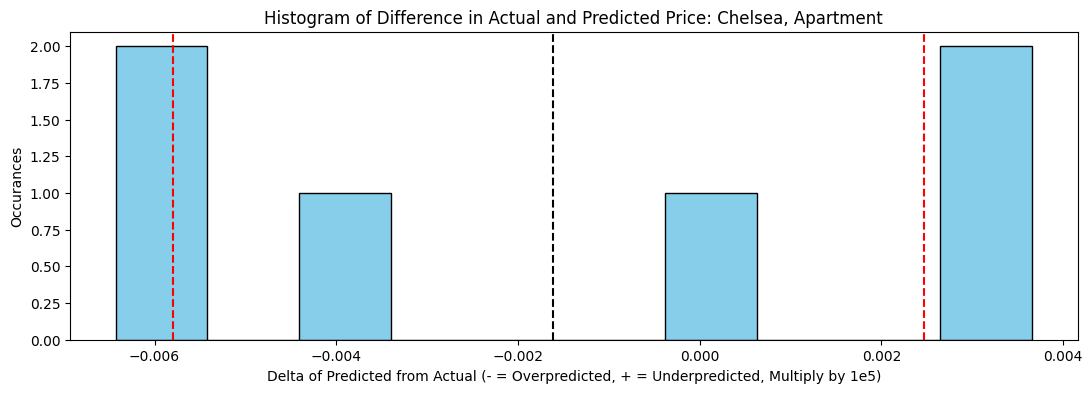

In [49]:
pred2 = predict(X2_test,w2,b2)

deltaActPred2 = y2_test - pred2

lowerQuartile = np.percentile(deltaActPred2,25)
upperQuartile = np.percentile(deltaActPred2,75)
meanDelta2 = np.mean(deltaActPred2)


fig = plt.figure(figsize=(13,4))
plt.hist(deltaActPred2,color='skyblue',edgecolor='black')
plt.axvline(x=meanDelta2,linestyle='--',color='black')
plt.axvline(x=lowerQuartile,linestyle='--',color='red')
plt.axvline(x=upperQuartile,linestyle='--',color='red')
plt.title('Histogram of Difference in Actual and Predicted Price: ' + neighborhood + ', ' + propertyType)
plt.xlabel('Delta of Predicted from Actual (- = Overpredicted, + = Underpredicted, Multiply by 1e5)')
plt.ylabel('Occurances')
plt.show()

In [51]:
print('Summary:')
print('')

if meanDelta2 < 0:
    print('The mean of the delta between actual and predicted housing price for a(n) ' + propertyType + ' in ' + neighborhood + ' is $' + str(math.ceil(meanDelta2*1e5)) + '. This means on average the housing price is overpredicted by $' + str(abs(math.ceil(meanDelta2*100000))) + '. When predicting homes ranging from hundreds of thousands to millions of pounds, this price difference is minute. The lower and upeer inner quartile range for the delta is $' + str(round(lowerQuartile*1e5,2)) + ' to $' + str(round(upperQuartile*1e5,2)) + '. The figure above demonstrates the model has a very high accuracy.')
if meanDelta2 > 0:
    print('The mean of the delta between actual and predicted housing price for a(n) ' + propertyType + ' in ' + neighborhood + ' is $' + str(math.ceil(meanDelta2*1e5)) + '. This means on average the housing price is underpredicted by $' + str(math.ceil(meanDelta2*100000)) + '. When predicting homes ranging from hundreds of thousands to millions of pounds, this price difference is minute. The lower and upeer inner quartile range for the delta is $' + str(round(lowerQuartile*1e5,2)) + ' to $' + str(round(upperQuartile*1e5,2)) +  '. The figure above demonstrates the model has a very high accuracy.')

Summary:

The mean of the delta between actual and predicted housing price for a(n) Apartment in Chelsea is $-161. This means on average the housing price is overpredicted by $161. When predicting homes ranging from hundreds of thousands to millions of pounds, this price difference is minute. The lower and upeer inner quartile range for the delta is $-579.33 to $246.81. The figure above demonstrates the model has a very high accuracy.


<h3>Statistics and Visualization</h3>
Section where statistics will be computed and visualized.


Lets start off by plotting the average cost of the property type by the neighborhood.

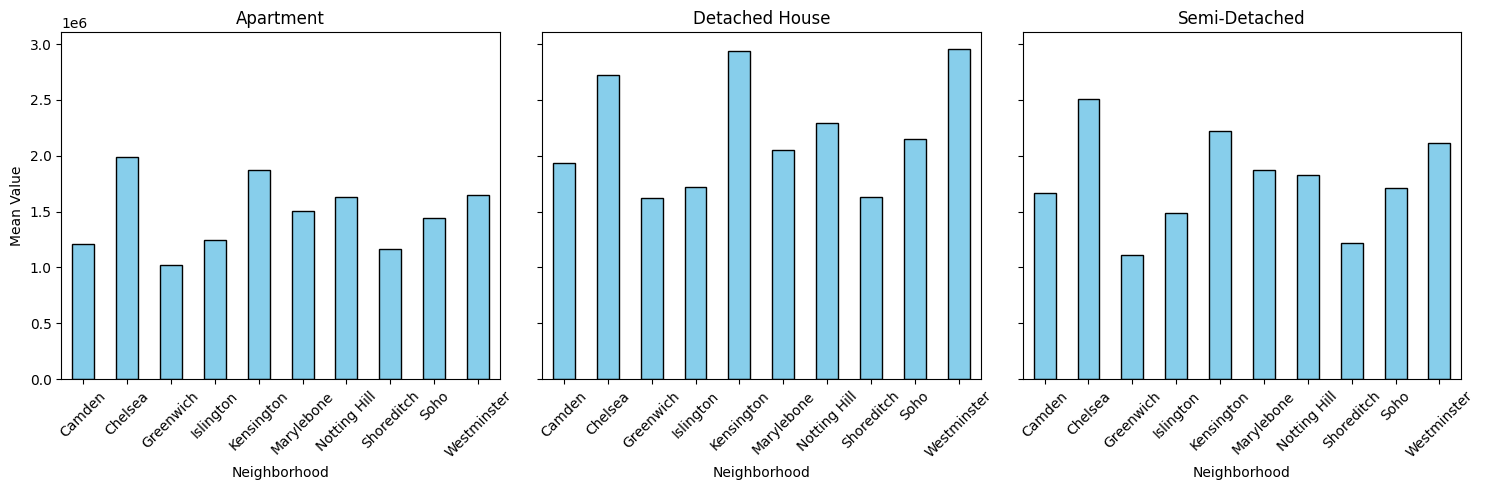

In [52]:
grouped = df_orig.groupby(["Neighborhood", "Property Type"])["Price (£)"].mean().unstack()

# Plotting separate histograms for each property type
property_types = grouped.columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for ax, property_type in zip(axes, property_types):
    grouped[property_type].dropna().plot(kind="bar", ax=ax, title=property_type,color='skyblue',edgecolor='black')
    ax.set_xlabel("Neighborhood")
    ax.set_ylabel("Mean Value")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

This visual can be condensed, lets plot the average price of property types into one by taking the average across each.

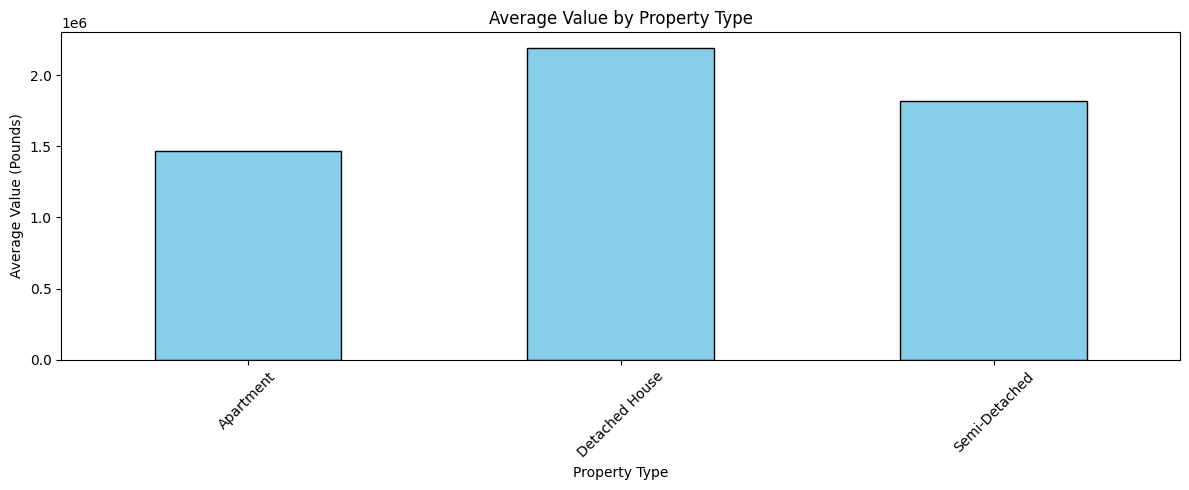

Property Type
Apartment         1.469727e+06
Detached House    2.191272e+06
Semi-Detached     1.815411e+06
Name: Price (£), dtype: float64


In [53]:
grouped2 = df_orig.groupby(['Property Type'])['Price (£)'].mean()

# Plotting the histogram
grouped2.plot(kind="bar", figsize=(12, 5), color="skyblue", edgecolor="black")
plt.title("Average Value by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Value (Pounds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(grouped2)

The average housing prices are above and they align with the typical property type pricing. Apartments being the least and detached houses costing the most. On average in neighborhoods, the pricing from least to greatest should be apartments, semi-detached houses, then detached houses.

<h3>Some Analysis of User Selected Neighborhood and Property Type</h3>
The output of the following cell will be the options for the user to enter which a neighborhood and property type to see the statistics of.

In [54]:
print('Neighborhood Options: ', df_orig['Neighborhood'].unique())
print()
print('Property Options:', df_orig['Property Type'].unique())

Neighborhood Options:  ['Notting Hill' 'Westminster' 'Soho' 'Islington' 'Marylebone' 'Kensington'
 'Greenwich' 'Shoreditch' 'Camden' 'Chelsea']

Property Options: ['Semi-Detached' 'Apartment' 'Detached House']


In [55]:
neighborhood = 'Shoreditch'
propertyType = 'Detached House'

df3 = df_orig[df_orig['Neighborhood'] == neighborhood]
df3 = df3[df3['Property Type'] == propertyType]

Lets visualize the pricing of the selected neighborhood and property type.

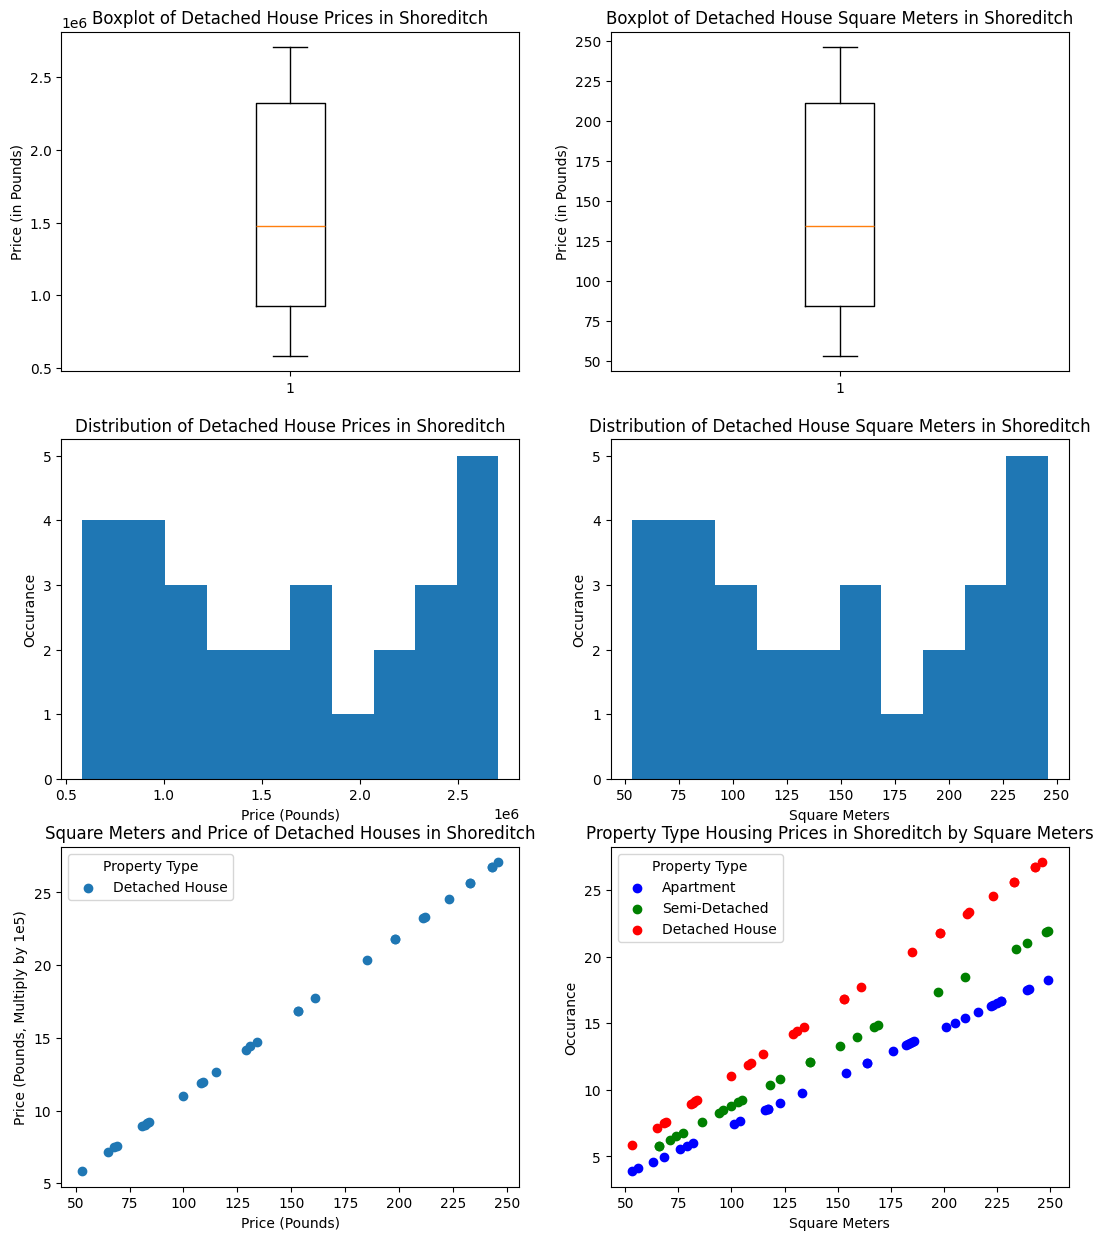

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(13,15))

axes[0,0].boxplot(df3['Price (£)'])
axes[0,0].set_title('Boxplot of ' + propertyType + ' Prices in ' + neighborhood)
axes[0,0].set_ylabel('Price (in Pounds)')

axes[0,1].boxplot(df3['Square Meters'])
axes[0,1].set_title('Boxplot of ' + propertyType + ' Square Meters in ' + neighborhood)
axes[0,1].set_ylabel('Price (in Pounds)')

axes[1,0].hist(df3['Price (£)'])
axes[1,0].set_title('Distribution of ' + propertyType + ' Prices in ' + neighborhood)
axes[1,0].set_xlabel('Price (Pounds)')
axes[1,0].set_ylabel('Occurance')


axes[1,1].hist(df3['Square Meters'])
axes[1,1].set_title('Distribution of ' + propertyType + ' Square Meters in ' + neighborhood)
axes[1,1].set_xlabel('Square Meters')
axes[1,1].set_ylabel('Occurance')

axes[2,0].scatter(df3['Square Meters'],df3['Price (£)']/100000, label = propertyType)
axes[2,0].set_title('Square Meters and Price of ' + propertyType + 's in ' + neighborhood)
axes[2,0].set_xlabel('Price (Pounds)')
axes[2,0].set_ylabel('Price (Pounds, Multiply by 1e5)')
axes[2,0].legend(title='Property Type')

neighborhoodDf = df_orig[df_orig['Neighborhood']==neighborhood].copy()
neighborhoodDf['Property Types'] = pd.factorize(neighborhoodDf['Property Type'])[0]+1
colors = {
    "Apartment": "blue",
    "Semi-Detached": "green",
    "Detached House": "red"
}

for category, color in colors.items():
    subset = neighborhoodDf[neighborhoodDf["Property Type"] == category]
    axes[2,1].scatter(subset["Square Meters"], subset['Price (£)']/100000, label=category, color=color)


#axes[2,1].scatter(neighborhoodDf['Square Meters'],neighborhoodDf['Price (£)']/100000,c=neighborhoodDf['Property Types'])
axes[2,1].set_title('Property Type Housing Prices in ' + neighborhood + ' by Square Meters')
axes[2,1].set_xlabel('Square Meters')
axes[2,1].set_ylabel('Occurance')
axes[2,1].legend(title="Property Type")

plt.show()

Depending on the selection, answers may vary slighlty. Although, you'll notice that the boxplot of the price and the square meters are extremely similar. This is due to the correlation between the variables.

Lets compute statistics on the selected data.

In [57]:
(df3['Price (£)'].sum())/len(df3['Price (£)'])

np.float64(1632172.3103448276)

In [58]:
print('Summary Statistics (Prices are in Pounds):')
print()

print('Mean Price: ', round(np.mean(df3['Price (£)'])))
print('Median Price: ', round(np.median(df3['Price (£)'])))
print('Minumum Price: ', min(df3['Price (£)']))
print('Maxumum Price: ', max(df3['Price (£)']))
print('Inner Quartile Range: ', round(np.percentile(df3['Price (£)'],75) - np.percentile(df3['Price (£)'],25)))
print()

print('Percentage Statistics (%):')
print('Each of the following outputs are in terms of percentage for the '  + neighborhood +  ' neighborhood with property type of ' + propertyType + '.')
print()

bedroomTypes = df3['Bedrooms'].value_counts() / len(df3['Bedrooms'])
print(bedroomTypes)
print()

bathroomTypes = df3['Bathrooms'].value_counts() / len(df3['Bathrooms'])
print(bathroomTypes)
print()

gardenTypes = df3['Garden'].value_counts() / len(df3['Garden'])
print(gardenTypes)
print()

garageTypes = df3['Garage'].value_counts() / len(df3['Garage'])
print(garageTypes)
print()

heatingTypes = df3['Heating Type'].value_counts() / len(df3['Heating Type'])
print(heatingTypes)
print()

balconyTypes = df3['Balcony'].value_counts() / len(df3['Balcony'])
print(balconyTypes)
print()

interiorTypes = df3['Interior Style'].value_counts() / len(df3['Interior Style'])
print(interiorTypes)
print() 

viewTypes = df3['View'].value_counts() / len(df3['View'])
print(viewTypes)
print()

materialTypes = df3['Materials'].value_counts() / len(df3['Materials'])
print(materialTypes)
print()

buildingTypes = df3['Building Status'].value_counts() / len(df3['Building Status'])
print(buildingTypes)
print()

Summary Statistics (Prices are in Pounds):

Mean Price:  1632172
Median Price:  1474000
Minumum Price:  583000
Maxumum Price:  2706000
Inner Quartile Range:  1397000

Percentage Statistics (%):
Each of the following outputs are in terms of percentage for the Shoreditch neighborhood with property type of Detached House.

Bedrooms
2    0.310345
4    0.275862
3    0.172414
5    0.137931
1    0.103448
Name: count, dtype: float64

Bathrooms
2    0.379310
1    0.344828
3    0.275862
Name: count, dtype: float64

Garden
Yes    0.517241
No     0.482759
Name: count, dtype: float64

Garage
No     0.551724
Yes    0.448276
Name: count, dtype: float64

Heating Type
Underfloor Heating    0.310345
Electric Heating      0.310345
Gas Heating           0.206897
Central Heating       0.172414
Name: count, dtype: float64

Balcony
High-level Balcony    0.344828
No Balcony            0.344828
Low-level Balcony     0.310345
Name: count, dtype: float64

Interior Style
Classic       0.275862
Industrial    0.275

<h3>Further Visualization on Impact of Each Feature on Price</h3>

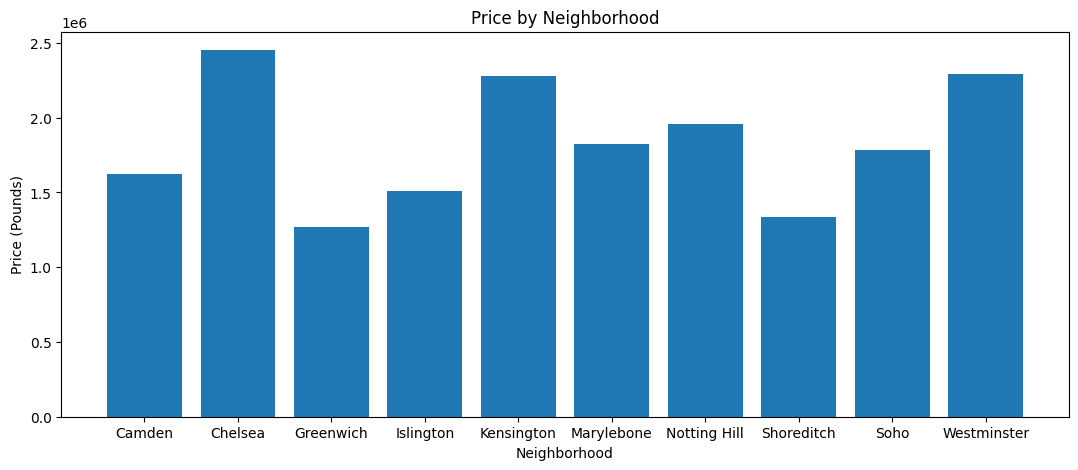

In [102]:
data = df_orig.groupby('Neighborhood')['Price (£)'].mean()
fig = plt.figure(figsize=(13,5))
plt.bar(data.index,data.values)
plt.title('Mean Price by Neighborhood')
plt.ylabel('Price (Pounds)')
plt.xlabel('Neighborhood')
plt.show()

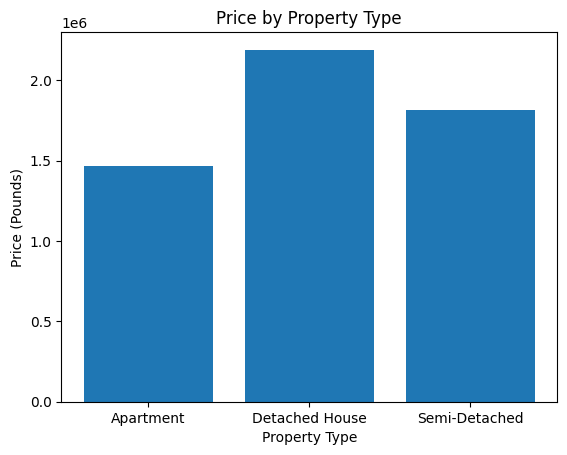

In [103]:
data = df_orig.groupby('Property Type')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Property Type')
plt.ylabel('Price (Pounds)')
plt.xlabel('Property Type')
plt.show()

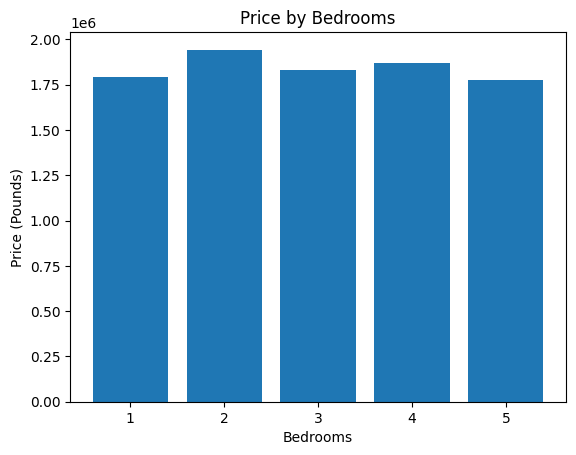

In [89]:
data = df_orig.groupby('Bedrooms')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Bedrooms')
plt.ylabel('Price (Pounds)')
plt.xlabel('Bedrooms')
plt.show()

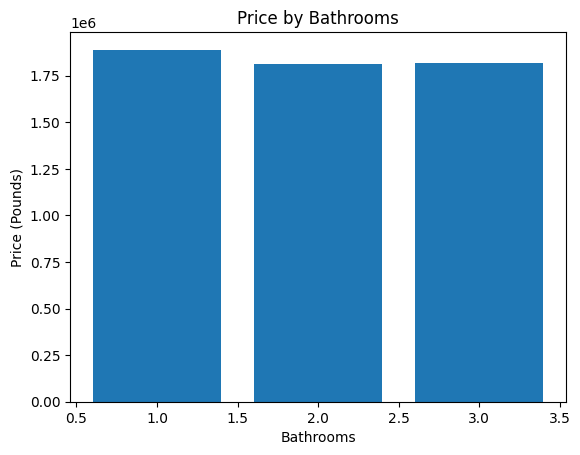

In [90]:
data = df_orig.groupby('Bathrooms')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Bathrooms')
plt.ylabel('Price (Pounds)')
plt.xlabel('Bathrooms')
plt.show()

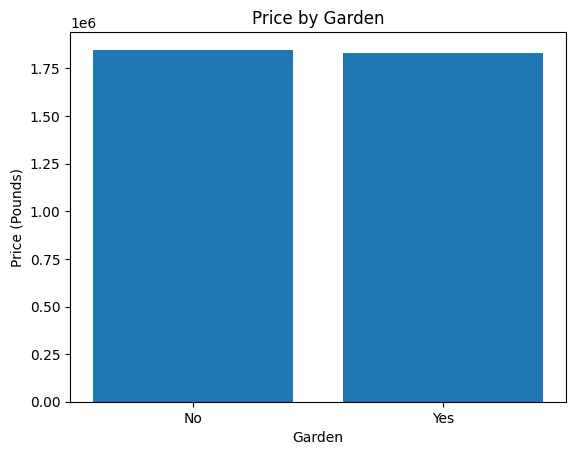

In [91]:
data = df_orig.groupby('Garden')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Garden')
plt.ylabel('Price (Pounds)')
plt.xlabel('Garden')
plt.show()

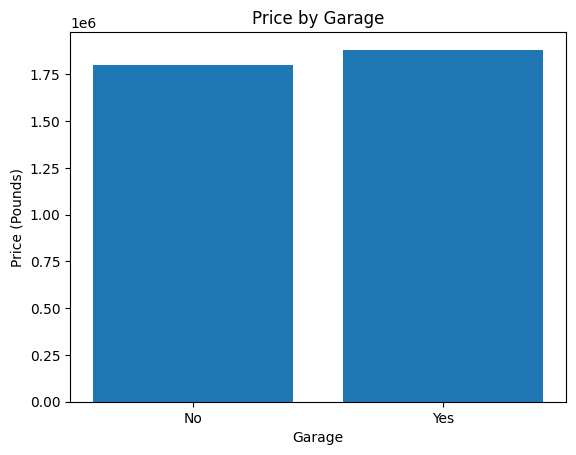

In [92]:
data = df_orig.groupby('Garage')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Garage')
plt.ylabel('Price (Pounds)')
plt.xlabel('Garage')
plt.show()

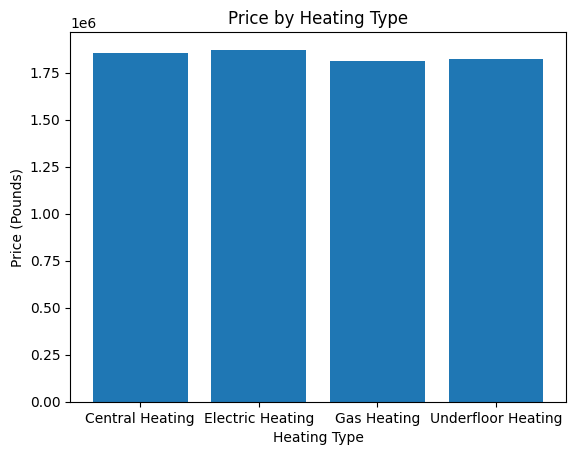

In [93]:
data = df_orig.groupby('Heating Type')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Heating Type')
plt.ylabel('Price (Pounds)')
plt.xlabel('Heating Type')
plt.show()

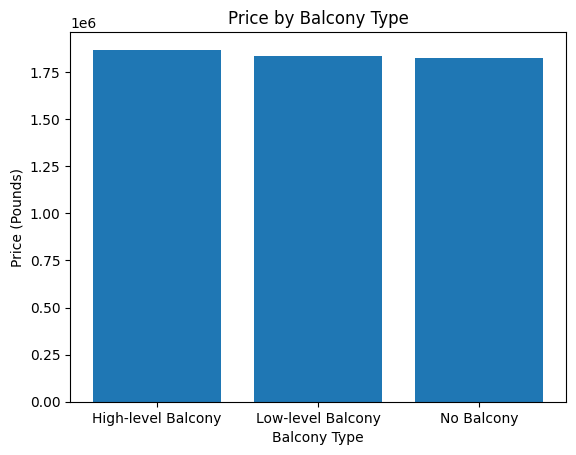

In [94]:
data = df_orig.groupby('Balcony')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Balcony Type')
plt.ylabel('Price (Pounds)')
plt.xlabel('Balcony Type')
plt.show()

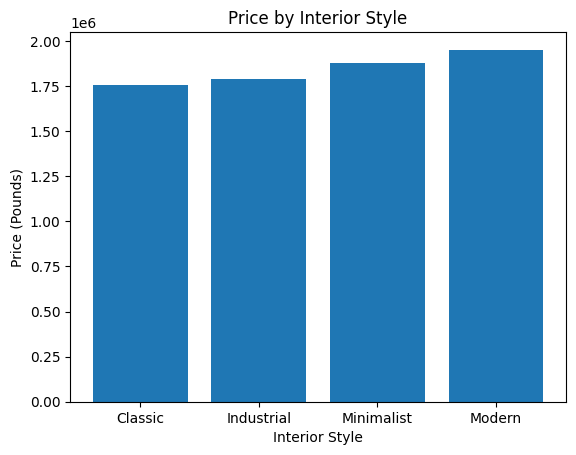

In [95]:
data = df_orig.groupby('Interior Style')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Interior Style')
plt.ylabel('Price (Pounds)')
plt.xlabel('Interior Style')
plt.show()

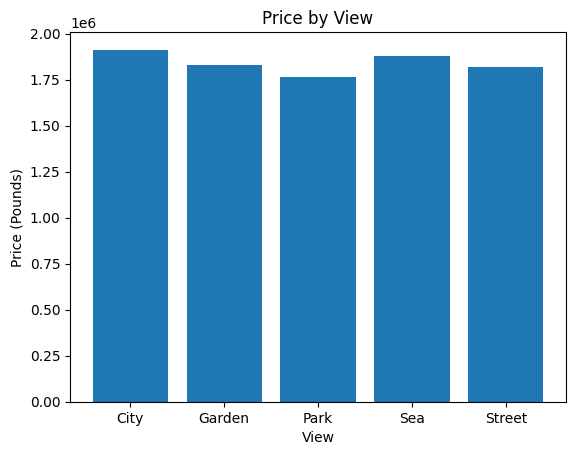

In [96]:
data = df_orig.groupby('View')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by View')
plt.ylabel('Price (Pounds)')
plt.xlabel('View')
plt.show()

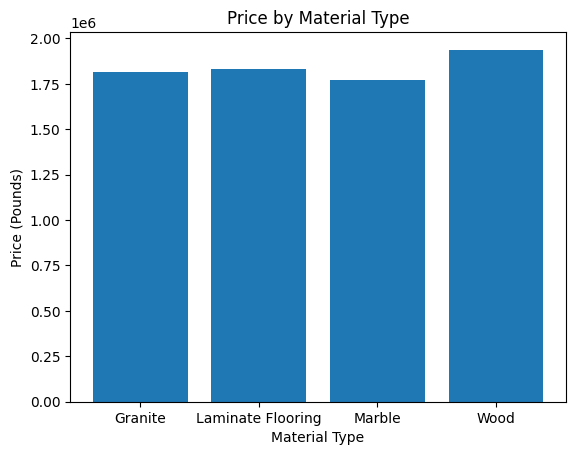

In [97]:
data = df_orig.groupby('Materials')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Material Type')
plt.ylabel('Price (Pounds)')
plt.xlabel('Material Type')
plt.show()

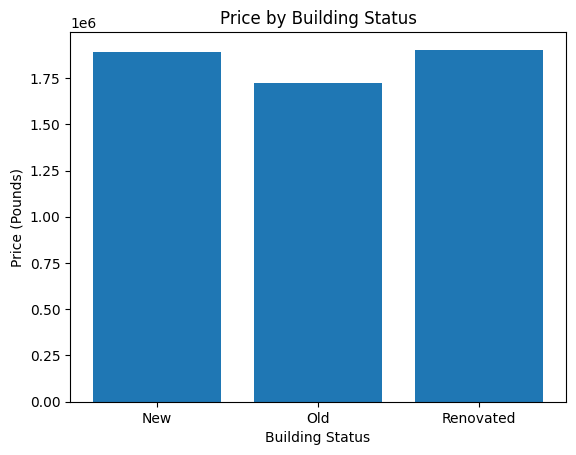

In [98]:
data = df_orig.groupby('Building Status')['Price (£)'].mean()
plt.bar(data.index,data.values)
plt.title('Mean Price by Building Status')
plt.ylabel('Price (Pounds)')
plt.xlabel('Building Status')
plt.show()

The only plots that show a sizeable difference in price are the neighborhood and property type features.